In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import List
import timeit
import time
import random
from IPython.display import clear_output
import numpy as np
import math




## Representation Methods for 0-1 Knapsack Problem
The first step in solving the 0-1 knapsack problem is to decide how to represent candidate solutions.

### 1. Integer Array
In this method, the index of the array represents the item, and the value at that index represents whether it is selected (1) or not (0).


In [106]:
integer_array = [1, 0, 1, 0, 1]
integer_array

[1, 0, 1, 0, 1]


### 2. Binary String

This is similar to the bit vector but uses a string of '0's and '1's to represent the selection.


In [107]:
binary_string = "10101"
binary_string

'10101'



### 3. Dictionary

The dictionary uses key-value pairs where the key is the index of the item and the value is either 0 or 1 to indicate the selection.


In [108]:
dictionary_representation = {0: 1, 1: 0, 2: 1, 3: 0, 4: 1}
dictionary_representation   


{0: 1, 1: 0, 2: 1, 3: 0, 4: 1}

### 4. Tree
A binary tree can be used to represent all possible solutions. Each node represents an item, and the left subtree indicates no selection, while the right subtree indicates selection.


In [109]:
tree_representation = [[[], [1]], [[], [2]], [[], [3]]]
tree_representation 


[[[], [1]], [[], [2]], [[], [3]]]



### 5. Graph

In a graph representation, vertices can represent items, and edges can represent correlations or constraints between items.



In [1]:
graph_representation = {0: [1, 2], 1: [0, 2], 2: [0, 1]}
graph_representation    


{0: [1, 2], 1: [0, 2], 2: [0, 1]}


The goal is to find the optimal combination of items to maximize the total value while staying within the knapsack's weight capacity.

**Example 1: 4 items 11 wmaxs**


Consider the following scenario:

- Number of items (n): 4
- Knapsack capacity (wmax): 11

The items available are as follows:

1. Item 1: Value (v1) = 6, Weight (w1) = 2
2. Item 2: Value (v2) = 10, Weight (w2) = 4
3. Item 3: Value (v3) = 12, Weight (w3) = 6
4. Item 4: Value (v4) = 13, Weight (w4) = 7


**Example 2: 7 items 50 wmaxs**

In this example, the parameters are:

- Number of items (n): 7
- Knapsack capacity (wmax): 50

The items available are:

1. Item 1: Value (v1) = 70, Weight (w1) = 31
2. Item 2: Value (v2) = 20, Weight (w2) = 10
3. Item 3: Value (v3) = 39, Weight (w3) = 20
4. Item 4: Value (v4) = 37, Weight (w4) = 19
5. Item 5: Value (v5) = 7, Weight (w5) = 4
6. Item 6: Value (v6) = 5, Weight (w6) = 3
7. Item 7: Value (v7) = 10, Weight (w7) = 6





### Using tree

In [111]:


def knapsack_decision_tree(weights, values, capacity):
    G = nx.DiGraph()
    pos = {}
    best_items = []
    max_value_with_items = [0]

    def dfs(level, current_weight, current_value, parent=None, selected_items=None):
        nonlocal G, pos, best_items, max_value_with_items
        node_label = f"{level}: {current_weight}, {current_value}"
        G.add_node(node_label)
        
        if parent is not None:
            G.add_edge(parent, node_label)
        
        pos[node_label] = (level * 2, -current_value)
        
        if current_weight > capacity:
            return 0

        if level == len(weights):
            if current_value > max_value_with_items[0]:
                max_value_with_items[0] = current_value
                best_items.clear()
                best_items.extend(selected_items)
            return current_value

        max_value_with_items[0] = max(max_value_with_items[0], dfs(level + 1, current_weight, current_value, node_label, selected_items))
        
        new_selected_items = selected_items.copy()
        new_selected_items.append(level)
        max_value_with_items[0] = max(max_value_with_items[0], dfs(level + 1, current_weight + weights[level], current_value + values[level], node_label, new_selected_items))

        return max_value_with_items[0]

    dfs(0, 0, 0, selected_items=[])

    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=9, node_size=1000)
    plt.title("Decision Tree for 0/1 Knapsack Problem")
    plt.text(0, min(pos.values(), key=lambda x: x[1])[1] - 4, f"Max Value: {max_value_with_items[0]}, Optimal Items: {[item + 1 for item in best_items]}", fontsize=12)

    plt.show()

    return max_value_with_items[0], [item +1  for item in best_items]


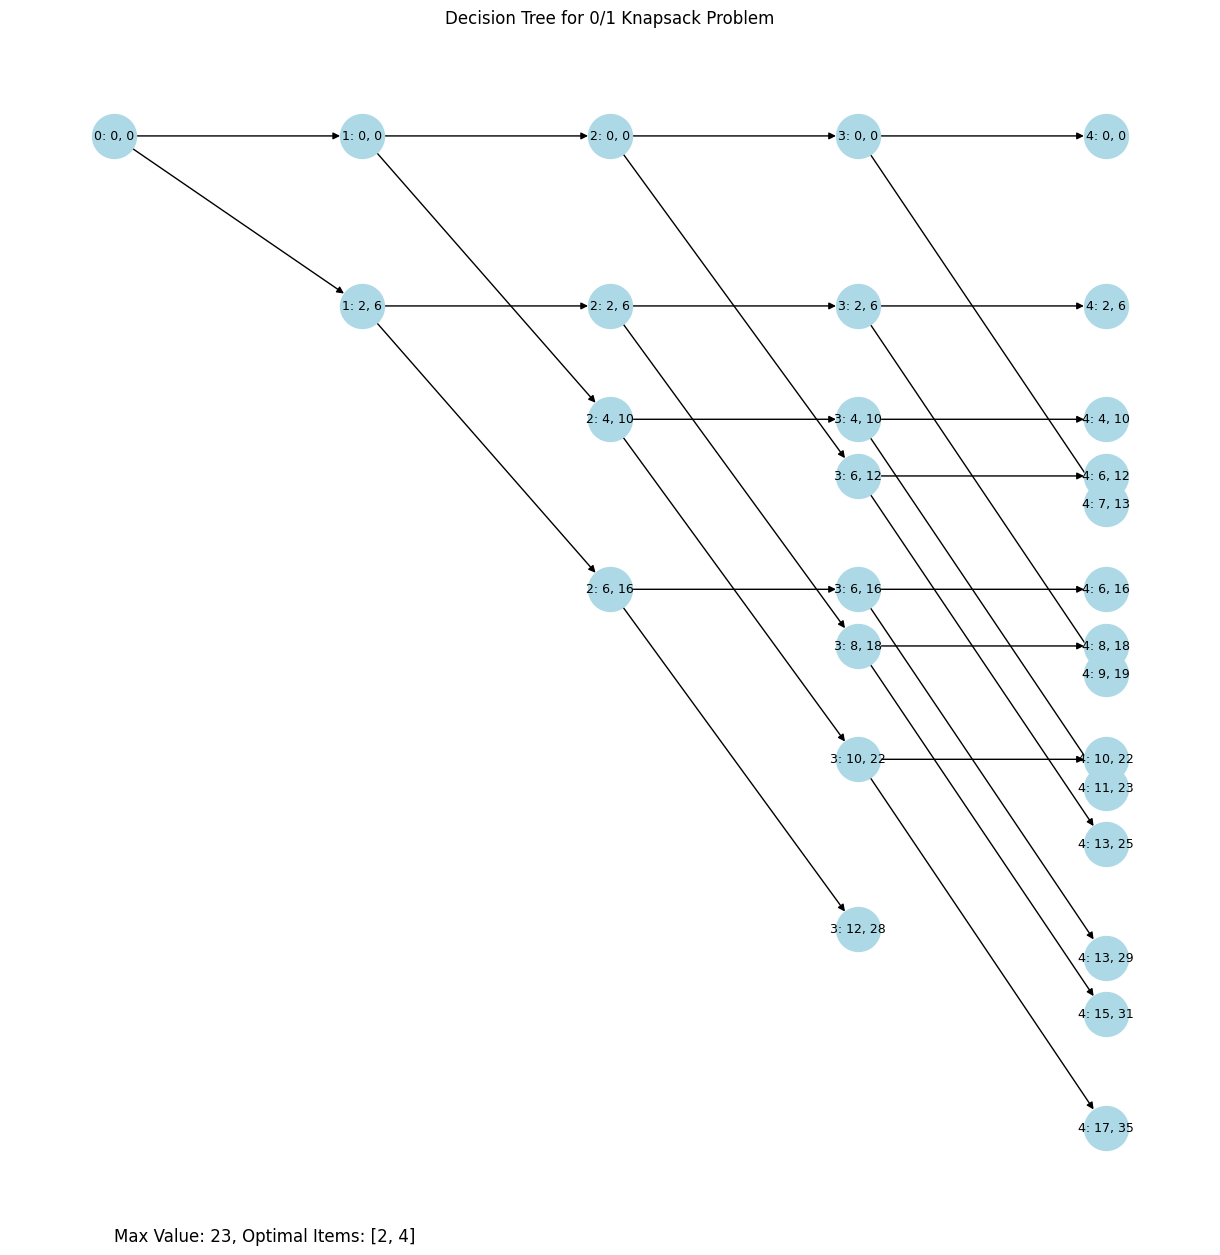

In [112]:

# Test the function
weights = [2,4,6,7]
values = [6,10,12,13]
capacity = 11

max_value, optimal_items = knapsack_decision_tree(weights, values, capacity)



\begin{array}{l}
\textbf{Algorithm: KnapsackDecisionTree}(weights, values, capacity) \\
\hline
1: \textbf{Input:} \\
\quad \text{weights: array of integers representing weights of items} \\
\quad \text{values: array of integers representing values of items} \\
\quad \text{capacity: integer representing the maximum capacity of the knapsack} \\
2: \textbf{Output:} \\
\quad \text{max\_value\_with\_items[0]: integer, maximum value achievable} \\
\quad \text{best\_items: array of integers, optimal items to include} \\
3: \textbf{Initialize:} \\
\quad \text{best\_items} \leftarrow \text{[]} \\
\quad \text{max\_value\_with\_items} \leftarrow [0] \\
4: \textbf{Function} \text{ dfs(level, current\_weight, current\_value, selected\_items):} \\
5: \quad \textbf{if} \text{ current\_weight } > \text{ capacity } \textbf{ then} \\
6: \quad \quad \textbf{return} \ 0 \\
7: \quad \textbf{end if} \\
8: \quad \textbf{if} \text{ level } = \text{ len(weights) } \textbf{ then} \\
9: \quad \quad \textbf{if} \text{ current\_value } > \text{ max\_value\_with\_items[0] } \textbf{ then} \\
10: \quad \quad \quad \text{max\_value\_with\_items[0] } \leftarrow \text{ current\_value } \\
11: \quad \quad \quad \text{best\_items} \leftarrow \text{selected\_items.copy()} \\
12: \quad \quad \textbf{end if} \\
13: \quad \quad \textbf{return} \ \text{current\_value} \\
14: \quad \textbf{end if} \\
15: \quad \text{new\_selected\_items} \leftarrow \text{selected\_items.copy()} \\
16: \quad \text{new\_selected\_items.append(level)} \\
17: \quad \text{value1} \leftarrow \text{dfs(level + 1, current\_weight, current\_value, selected\_items)} \\
18: \quad \text{value2} \leftarrow \text{dfs(level + 1, current\_weight + weights[level], current\_value + values[level], new\_selected\_items)} \\
19: \quad \text{max\_value\_with\_items[0]} \leftarrow \text{max(max\_value\_with\_items[0], value1, value2)} \\
20: \quad \textbf{return} \ \text{max\_value\_with\_items[0]} \\
21: \textbf{end Function} \\
22: \text{dfs}(0, 0, 0, \text{[]}) \\
23: \textbf{return} \ \text{max\_value\_with\_items[0], best\_items} \\
\end{array}



`knapsack_decision_tree` uses depth-first search (DFS) to traverse all possible solution paths, which is an exhaustive method.

The time complexity is \(O(2^n)\), where \(n\) is the number of items. This is because every time we call it recursively, we have two choices: include the current item or not include the current item. Therefore, each level of the decision tree doubles the number of possible paths. In the worst case, we need to traverse all \(2^n\) possible paths to find the optimal solution.

Note that this method is very time consuming, especially when the number of items is large. This is why for larger problem instances, we usually choose to use dynamic programming or other more efficient algorithms to solve the knapsack problem.

#### Use dynamic programming

In [5]:


# Re-run the function to solve the knapsack problem using dynamic programming and print the DP table

def knapsack_dp(n: int, w_max: int, values: List[int], weights: List[int]) -> int:
    """
    Solve the 0/1 knapsack problem using dynamic programming and print the DP table in a readable format.
    
    Parameters:
    - n (int): The number of items.
    - w_max (int): The maximum weight capacity of the knapsack.
    - values (List[int]): The values of the items.
    - weights (List[int]): The weights of the items.
    
    Returns:
    - int: The maximum value that can be achieved within the weight limit.
    """
    # Initialize the DP table with zeros
    dp = [[0 for _ in range(w_max + 1)] for _ in range(n + 1)]
    
    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(w_max + 1):
            if weights[i-1] > w:
                dp[i][w] = dp[i-1][w]
            else:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-weights[i-1]] + values[i-1])
    
    # Print the DP table in a readable format
    print(f"{'':<5}", end='')
    for w in range(w_max + 1):
        print(f"{w:<3}", end='')
    print()
    
    for i in range(n + 1):
        print(f"{i:<5}", end='')
        for w in range(w_max + 1):
            print(f"{dp[i][w]:<3}", end='')
        print()
    
    return dp[n][w_max]




In [6]:
# Define the problem instance again due to reset

n = 4
weights = [2,4,6,7]
values = [6,10,12,13]
capacity = 11

# Solve the 0/1 knapsack problem and print the DP table
case1 = knapsack_dp(n, capacity, values, weights)




     0  1  2  3  4  5  6  7  8  9  10 11 
0    0  0  0  0  0  0  0  0  0  0  0  0  
1    0  0  6  6  6  6  6  6  6  6  6  6  
2    0  0  6  6  10 10 16 16 16 16 16 16 
3    0  0  6  6  10 10 16 16 18 18 22 22 
4    0  0  6  6  10 10 16 16 18 19 22 23 



\begin{array}{l}
\textbf{Algorithm: KnapsackDPWithPrint}(n, w\_max, values, weights) \\
\hline
1: \textbf{Input:} \\
\quad n: \text{integer, number of items} \\
\quad w\_max: \text{integer, maximum weight capacity of the knapsack} \\
\quad values: \text{list of integers, values of the items} \\
\quad weights: \text{list of integers, weights of the items} \\
2: \textbf{Output:} \\
\quad \text{dp[n][w\_max]: integer, maximum value achievable} \\
3: \textbf{Initialize:} \\
\quad \text{dp} \leftarrow \text{2D array of size (n+1) x (w\_max+1), initialized to 0} \\
4: \textbf{Procedure: Fill the DP Table} \\
5: \quad \textbf{for} \ i \ \textbf{in range}(1, n+1) \ \textbf{do} \\
6: \quad \quad \textbf{for} \ w \ \textbf{in range}(w\_max+1) \ \textbf{do} \\
7: \quad \quad \quad \textbf{if} \ \text{weights}[i-1] > w \ \textbf{then} \\
8: \quad \quad \quad \quad \text{dp}[i][w] \leftarrow \text{dp}[i-1][w] \\
9: \quad \quad \quad \textbf{else} \\
10: \quad \quad \quad \quad \text{dp}[i][w] \leftarrow \text{max(dp}[i-1][w], \text{dp}[i-1][w-\text{weights}[i-1]] + \text{values}[i-1]) \\
11: \quad \quad \quad \textbf{end if} \\
12: \quad \quad \textbf{end for} \\
13: \quad \textbf{end for} \\
14: \textbf{Procedure: Print the DP Table} \\
15: \quad \text{Print formatted DP table header and rows} \\
16: \textbf{Return:} \\
17: \quad \textbf{return} \ \text{dp}[n][w\_max] \\
\end{array}



#### More detailed dynamic programming that changes color


In [8]:

def knapsack_dp_with_dynamic_print(n: int, w_max: int, values: List[int], weights: List[int]) -> int:
    """
    Solve the 0/1 knapsack problem using dynamic programming and dynamically print the DP table in the console.
    
    Parameters:
    - n (int): The number of items.
    - w_max (int): The maximum weight capacity of the knapsack.
    - values (List[int]): The values of the items.
    - weights (List[int]): The weights of the items.
    
    Returns:
    - int: The maximum value that can be achieved within the weight limit.
    """
    # Initialize the DP table with zeros
    dp = [[0 for _ in range(w_max + 1)] for _ in range(n + 1)]
    
    # Function to print the DP table
    def print_table(i_current, w_current):
        clear_output(wait=True)
        print(f"{'':<5}", end='')
        for w in range(w_max + 1):
            print(f"{w:<3}", end='')
        print()
        
        for i in range(n + 1):
            print(f"{i:<5}", end='')
            for w in range(w_max + 1):
                if i == i_current and w == w_current:
                    print(f"\033[31m{dp[i][w]:<3}\033[0m", end='')
                else:
                    print(f"{dp[i][w]:<3}", end='')
            print()
        print("\n" + "="*80 + "\n")  # Print a separator line

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(w_max + 1):
            if weights[i-1] > w:
                dp[i][w] = dp[i-1][w]
            else:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-weights[i-1]] + values[i-1])
            
            # Print the updated DP table
            print_table(i, w)
            time.sleep(0.3)
    
    return dp[n][w_max]

# Solve the 0/1 knapsack problem and dynamically print the DP table
max_value_with_dynamic_print = knapsack_dp_with_dynamic_print(n, capacity, values, weights)
max_value_with_dynamic_print



     0  1  2  3  4  5  6  7  8  9  10 11 
0    0  0  0  0  0  0  0  0  0  0  0  0  
1    0  0  6  6  6  6  6  6  6  6  6  6  
2    0  0  6  6  10 10 16 16 16 16 16 16 
3    0  0  6  6  10 10 16 16 18 18 22 22 
4    0  0  6  6  10 10 16 16 18 19 22 23 




23

#### Testing, choosing different candidate keys, and why

In [116]:


from timeit import timeit
import random

class KnapsackProblem:
    def __init__(self, items, capacity):
        self.items = items
        self.capacity = capacity

    def initialize_integer_array(self):
        return [random.choice([0, 1]) for _ in range(len(self.items))]

    def initialize_binary_string(self):
        return "".join(str(random.choice([0, 1])) for _ in range(len(self.items)))

    def initialize_dictionary(self):
        return {i: random.choice([0, 1]) for i in range(len(self.items))}

    def initialize_tree(self):
        # Here we will initialize a binary tree representation. 
        # In this representation, a node at position i in the array represents the i-th item.
        # The two children of this node represent including (right child) or not including (left child) this item in the solution.
        # We initialize it as a complete binary tree with 2^n nodes where n is the number of items.
        return [random.choice([0, 1]) for _ in range(2 ** (len(self.items) + 1) - 1)]

    def initialize_graph(self):
        # Here we will initialize a graph representation.
        # In this representation, a vertex represents an item, and an edge between two vertices represents that the two items are either both included or both excluded from the solution.
        # We initialize it as a complete graph with n vertices where n is the number of items.
        return {i: [j for j in range(len(self.items)) if j != i] for i in range(len(self.items))}

# Loading the data for the cases
case1 = {
    "items": [(6, 2), (10, 4), (12, 6), (13, 7)],
    "capacity": 11
}

case2 = {
    "items": [(70, 31), (20, 10), (39, 20), (37, 19), (7, 4), (5, 3), (10, 6)],
    "capacity": 50
}

# Creating instances for both cases
kp_case1 = KnapsackProblem(**case1)
kp_case2 = KnapsackProblem(**case2)

# Testing initialization functions

print("Integer array representation:", kp_case1.initialize_integer_array())
print("Binary string representation:", kp_case1.initialize_binary_string())
print("Dictionary representation:", kp_case1.initialize_dictionary())
print("Tree representation:", kp_case1.initialize_tree())
print("Graph representation:", kp_case1.initialize_graph())




Integer array representation: [0, 0, 0, 0]
Binary string representation: 0111
Dictionary representation: {0: 0, 1: 0, 2: 1, 3: 1}
Tree representation: [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
Graph representation: {0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}


In [117]:
# Function to test the speed of initialization functions
def test_initialization_speed(instance, func_name):
    total_time = timeit(
        f'instance.{func_name}()', 
        setup=f'from __main__ import instance', 
        number=1000
    )
    return total_time * 1000  # Convert time to milliseconds

# Setting different random seeds for each run
random_seeds = [i for i in range(1000)]

# Function to calculate total initialization time using different random seeds
def calculate_total_initialization_time(instance, func_name):
    total_time = 0
    for seed in random_seeds:
        random.seed(seed)
        total_time += test_initialization_speed(instance, func_name)
    return total_time


def test_initialization_speed(instance, func_name):
    total_time = timeit(
        f'instance.{func_name}()', 
        setup=f'from __main__ import kp_case2 as instance', 
        number=1000
    )
    return total_time * 1000  # Convert time to milliseconds

# Calculating total initialization time for each representation method in case 2
# initialization_times_case2 = {
#     "Integer Array": calculate_total_initialization_time(kp_case2, 'initialize_integer_array'),
#     "Binary String": calculate_total_initialization_time(kp_case2, 'initialize_binary_string'),
#     "Dictionary": calculate_total_initialization_time(kp_case2, 'initialize_dictionary'),
#     "Tree": calculate_total_initialization_time(kp_case2, 'initialize_tree'),
#     "Graph": calculate_total_initialization_time(kp_case2, 'initialize_graph'),
# }

# initialization_times_case2


{'Integer Array': 4984.357352998813,
 'Binary String': 6589.528848988266,
 'Dictionary': 5158.443562992943,
 'Tree': 5285.082318006971,
 'Graph': 12272.220026005925}

#### Then we decided to use the 01 array

In [118]:
class Knapsack:
    def __init__(self, n=None, capacity=None, weights=None, values=None):
        if n is None:
            self.random_init()
        else:
            self.n = n
            self.capacity = capacity
            self.weights = weights
            self.values = values
            self.selection = [0] * n  # Initializing the selection with all items not selected

    # Method to initialize with random data
    def random_init(self):
        self.n = 5
        self.capacity = random.randint(10, 100)
        self.weights = [random.randint(1, 20) for _ in range(self.n)]
        self.values = [random.randint(1, 100) for _ in range(self.n)]
        self.selection = [0] * self.n  # Initializing the selection with all items not selected

    # Method to return the representation of the knapsack selection
    def representation(self):
        return self.selection

    # Class method to evaluate a solution
    @classmethod
    def evaluate_solution(cls, solution, weights, values, capacity):
        total_value = 0
        total_weight = 0
        for i in range(len(solution)):
            if solution[i] == 1:
                total_value += values[i]
                total_weight += weights[i]

        feasibility = "Feasible" if total_weight <= capacity else "Infeasible" # Check if the solution is feasible
        
        return total_value, total_weight, feasibility

    def __str__(self):
        return f"Knapsack(n={self.n}, capacity={self.capacity}, weights={self.weights}, values={self.values}, selection={self.selection})"


#### Test sample

In [119]:

# Test method evaluate_solution
test_1 = Knapsack.evaluate_solution(solution=[0, 0, 0, 0], weights=[2, 4, 6, 7], values=[6, 10, 12, 13], capacity=11)
print(test_1)


# Initializing the weights, values, and capacity
weights = [2, 4, 6, 7]
values = [6, 10, 12, 13]
capacity = 11

# Evaluating the given solutions
solution1 = [0, 0, 1, 0]
solution2 = [1, 1, 1, 1]
solution3 = [1, 0, 1, 0]

evaluation1 = Knapsack.evaluate_solution(solution=solution1, weights=weights, values=values, capacity=capacity)
evaluation2 = Knapsack.evaluate_solution(solution=solution2, weights=weights, values=values, capacity=capacity)
evaluation3 = Knapsack.evaluate_solution(solution=solution3, weights=weights, values=values, capacity=capacity)

evaluation1, evaluation2, evaluation3





(0, 0, 'Feasible')


((12, 6, 'Feasible'), (41, 19, 'Infeasible'), (18, 8, 'Feasible'))

In [120]:
case2 = {
    "items": [(70, 31), (20, 10), (39, 20), (37, 19), (7, 4), (5, 3), (10, 6)],
    "capacity": 50
}
# Extracting the values and weights from the case2 dictionary
values_case2 = [item[0] for item in case2["items"]]
weights_case2 = [item[1] for item in case2["items"]]
capacity_case2 = case2["capacity"]
knapsack_instance_case2 = Knapsack(n=len(values_case2), capacity=capacity_case2, weights=weights_case2, values=values_case2)
print(knapsack_instance_case2)




Knapsack(n=7, capacity=50, weights=[31, 10, 20, 19, 4, 3, 6], values=[70, 20, 39, 37, 7, 5, 10], selection=[0, 0, 0, 0, 0, 0, 0])
